DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe74877730>


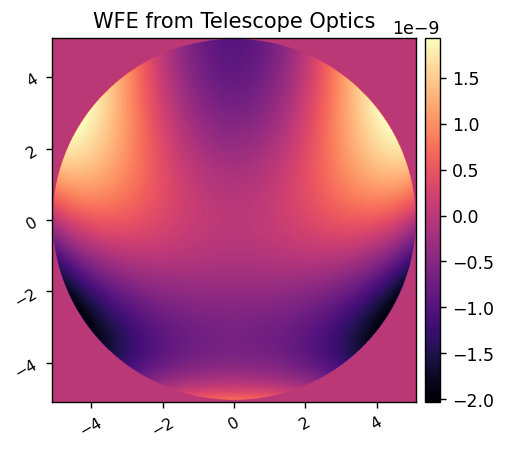

In [2]:
import numpy as np
import cupy as cp
import poppy
xp = cp if poppy.accel_math._USE_CUPY else np

from poppy.poppy_core import PlaneType

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display

from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

from prop_models import full, compact, agpm
reload(full)
reload(compact)
reload(agpm)

from wfsc_1dm import efc, pwp, utils

import misc_funs as misc

pupil_diam = 10.2*u.mm
wavelength_c = 750e-9*u.m

vortex = agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6)

lyot_stop_physical = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm)
lyot_stop_compact = poppy.CircularAperture(name='Lyot Stop', radius=3*u.mm * 500/350)

hdr = fits.getheader('wfe_on_axis.fits')
ote_wfe = poppy.FITSOpticalElement(opd='wfe_on_axis.fits', opdunits='meters',
                                   pixelscale=pupil_diam.to_value(u.m)/hdr['NAXIS1'])
misc.imshow1(ote_wfe.opd, 'WFE from Telescope Optics', pxscl=ote_wfe.pixelscale.to(u.mm/u.pix))



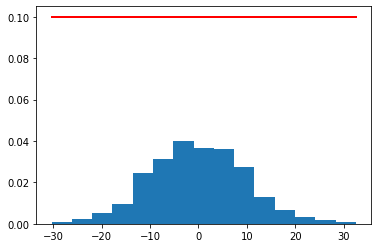

In [93]:
pointing_error = 10*u.mas
mean = 0

pointing_r = np.random.default_rng().normal(mean, pointing_error.to_value(u.mas), 1000)
pointing_th = np.random.default_rng().uniform(low=0.0, high=2*np.pi, size=1000)

pointing_x = pointing_r*np.cos(pointing_th)
pointing_y = pointing_r*np.sin(pointing_th)

# plt.plot(pointing_r)
# plt.plot(pointing_th)

count, bins, ignored = plt.hist(pointing_r, 15, density=True)
plt.plot(bins, np.ones_like(bins)/pointing_error.to_value(u.mas), linewidth=2, color='r')
plt.show()

# count, bins, ignored = plt.hist(pointing_th, 15, density=True)
# plt.plot(bins, 1/(2*np.pi)*np.ones_like(bins), linewidth=2, color='r')
# plt.show()

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efdae081910>


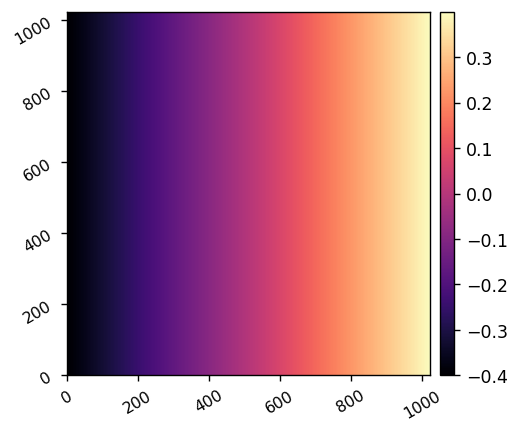

In [92]:
m3y, m3x = m3wf.coordinates()

misc.imshow1(m3x)

DEBUG:poppy:Skipping oversampling, oversample < 1 or already padded 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efdadf727f0>


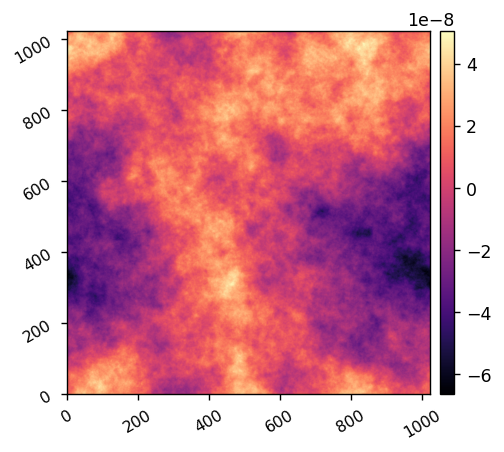

DEBUG:poppy:Skipping oversampling, oversample < 1 or already padded 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efdadea79a0>


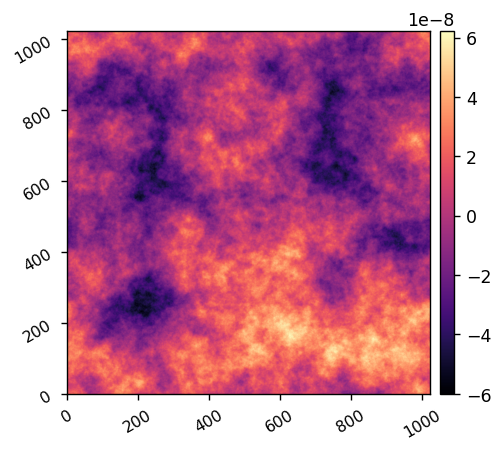

DEBUG:poppy:Skipping oversampling, oversample < 1 or already padded 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efdaddda940>


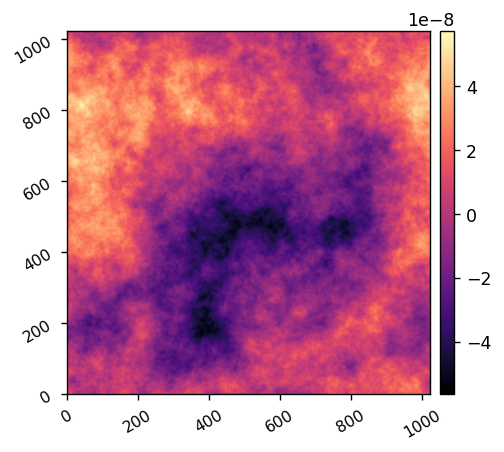

DEBUG:poppy:Skipping oversampling, oversample < 1 or already padded 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efdadd0be50>


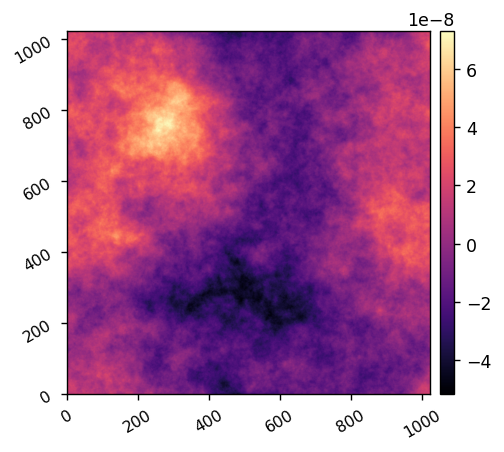

In [57]:
poppy_log.disabled = False

m1_diam = 6.5*u.m
m2_diam = 700*u.mm
m3_diam = 800*u.mm
m3_dims = [800*u.mm, 700*u.mm]

m4_diam = 100*u.mm

seeds = (1,2,3,4)

m1surf = poppy.StatisticalPSDWFE('M1 Surface OPD', index=3.0, wfe=20*u.nm, radius=m1_diam/2, seed=seeds[0])
m2surf = poppy.StatisticalPSDWFE('M2 Surface OPD', index=3.0, wfe=20*u.nm, radius=m2_diam/2, seed=seeds[1])
m3surf = poppy.StatisticalPSDWFE('M3 Surface OPD', index=3.0, wfe=20*u.nm, radius=m3_diam/2, seed=seeds[2])
m4surf = poppy.StatisticalPSDWFE('M4 Surface OPD', index=3.0, wfe=20*u.nm, radius=m4_diam/2, seed=seeds[3])

npix = 1024
oversample = 1

m1wf = poppy.FresnelWavefront(beam_radius=m1_diam/2, npix=npix, oversample=oversample)
m1errs = m1surf.get_opd(m1wf)
misc.imshow1(m1errs)

m2wf = poppy.FresnelWavefront(beam_radius=m2_diam/2, npix=npix, oversample=oversample)
m2errs = m2surf.get_opd(m2wf)
misc.imshow1(m2errs)

m3wf = poppy.FresnelWavefront(beam_radius=m3_diam/2, npix=npix, oversample=oversample)
m3errs = m3surf.get_opd(m3wf)
misc.imshow1(m3errs)

m4wf = poppy.FresnelWavefront(beam_radius=m4_diam/2, npix=npix, oversample=oversample)
m4errs = m4surf.get_opd(m4wf)
misc.imshow1(m4errs)


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.LogLocator object at 0x7efdae40e610>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efdae46c0a0>
DEBUG:matplotlib.ticker:vmin 2.189037042514968e-15 vmax 4.147773594999445e-05
DEBUG:matplotlib.ticker:ticklocs array([1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03,
       1.e-01])
DEBUG:matplotlib.ticker:vmin 2.189037042514968e-15 vmax 4.147773594999445e-05
DEBUG:matplotlib.ticker:ticklocs array([1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03,
       1.e-01])
DEBUG:matplotlib.ticker:vmin 2.189037042514968e-15 vmax 4.147773594999445e-05
DEBUG:matplotlib.ticker:ticklocs array([], dtype=float64)
DEBUG:matplotlib.ticker:vmin 2.189037042514968e-15 vmax 4.147773594999445e-05
DEBUG:matplotlib.ticker:ticklocs array([1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03,
       1.e-01])
DEBUG:matplotlib.ticker:vmin 2.189037042514968e-15 vmax 4.147773594999445e-05
DEBUG:mat

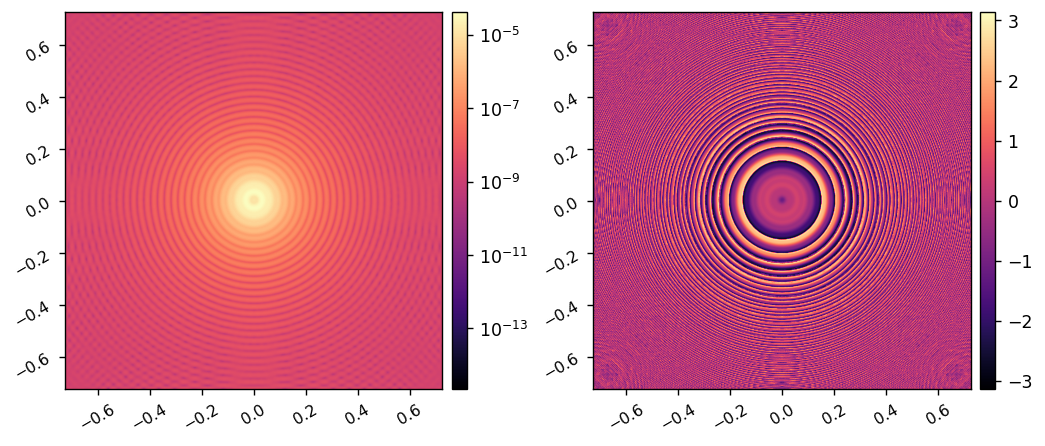

In [87]:
poppy_log.disabled = True

npix = 256
oversample = 8
pupil_diam = m1_diam
PUPIL = poppy.CircularAperture(radius=pupil_diam/2)

fl_m1 = 3.652962023674745E+004/2*u.mm
fl_m2 = -3.636649801410836E+003/2*u.mm
fl_m3 = 3.463978665836946E+003/2*u.mm

m1 = poppy.QuadraticLens(fl_m1, name='M1')
m2 = poppy.QuadraticLens(fl_m2, name='M2')
m3 = poppy.QuadraticLens(fl_m3, name='M3')
m4 = poppy.ScalarTransmission()

fosys = poppy.FresnelOpticalSystem(pupil_diameter=pupil_diam, npix=npix, beam_ratio=1/oversample)
fosys.add_optic(PUPIL)
fosys.add_optic(m1)
# fosys.add_optic(m1surf)
fosys.add_optic(m2, distance=1.663812910134875E+004*u.mm)
# fosys.add_optic(m2surf)
fosys.add_optic(m3, distance=(16500+2000)*u.mm)
# fosys.add_optic(m3surf)
fosys.add_optic(m4, distance=1.895000000000000E+003*u.mm)
# fosys.add_optic(m4surf)
fosys.add_optic(poppy.ScalarTransmission('Image'), distance=2.091997751264193E+003*u.mm + 0*u.mm)

_, wfs = fosys.calc_psf(wavelength=750*u.nm, return_intermediates=True)

misc.imshow2(wfs[-1].intensity, wfs[-1].phase, lognorm1=True, pxscl=wfs[-1].pixelscale.to_value(u.mm/u.pix))

<Quantity 0.00634766 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe5c9afa30>
DEBUG:matplotlib.colorbar:colorbar update normal <matplotlib.colors.Normalize object at 0x7efe5d20d8e0> <matplotlib.colors.Normalize object at 0x7efe5d20d8e0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe5cad95e0>
DEBUG:matplotlib.colorbar:colorbar update normal <matplotlib.colors.Normalize object at 0x7efe5d20d8e0> <matplotlib.colors.Normalize object at 0x7efe5d20d8e0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe5cad95e0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe5cbf39a0>


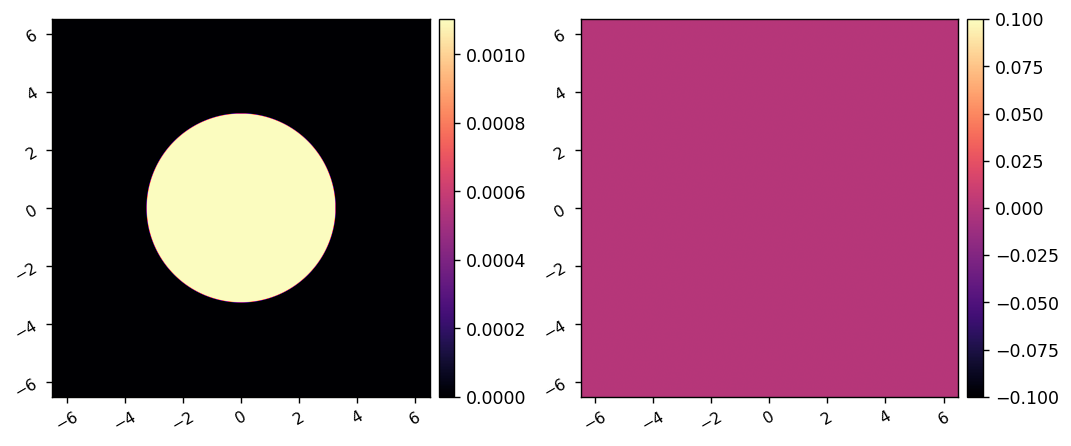

<Quantity 0.00634766 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe7418cc40>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe741cdbb0>


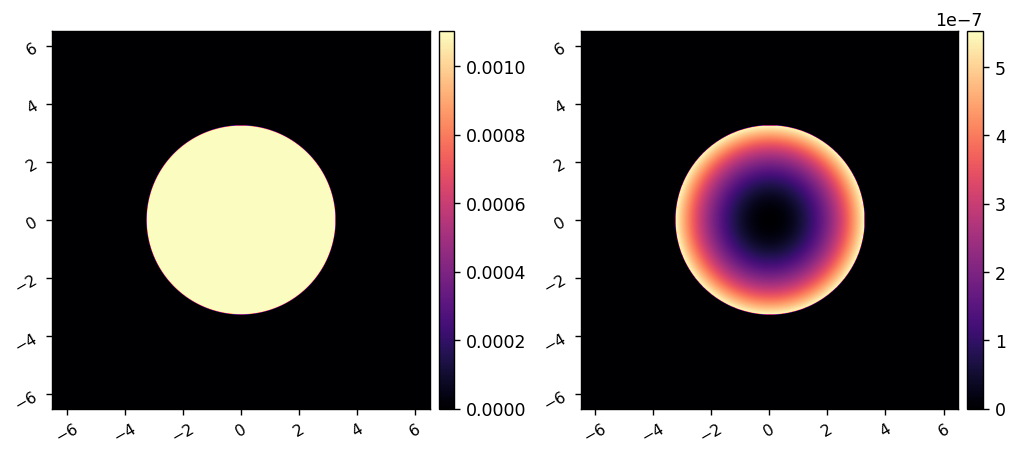

<Quantity 0.00634766 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe744d4c10>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe744f9160>


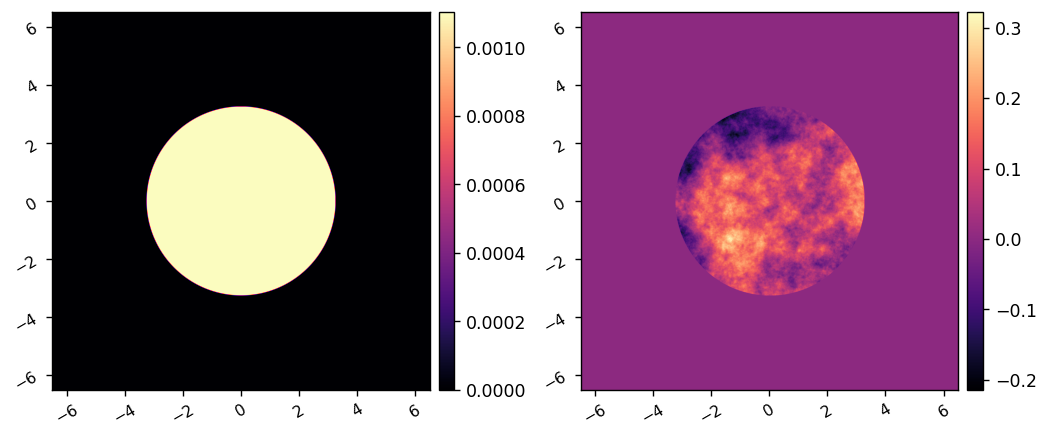

<Quantity 0.00056533 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe7484d610>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe742792e0>


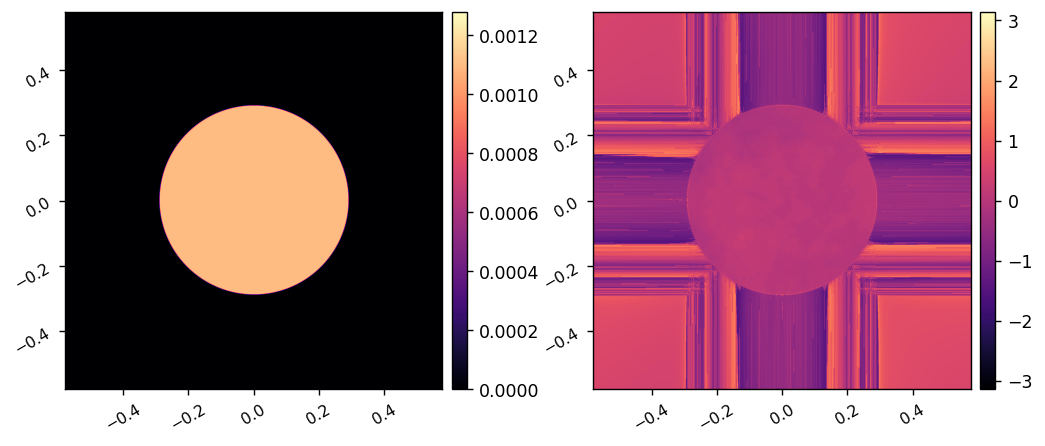

<Quantity 0.00056533 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe5d2c0580>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe74181e50>


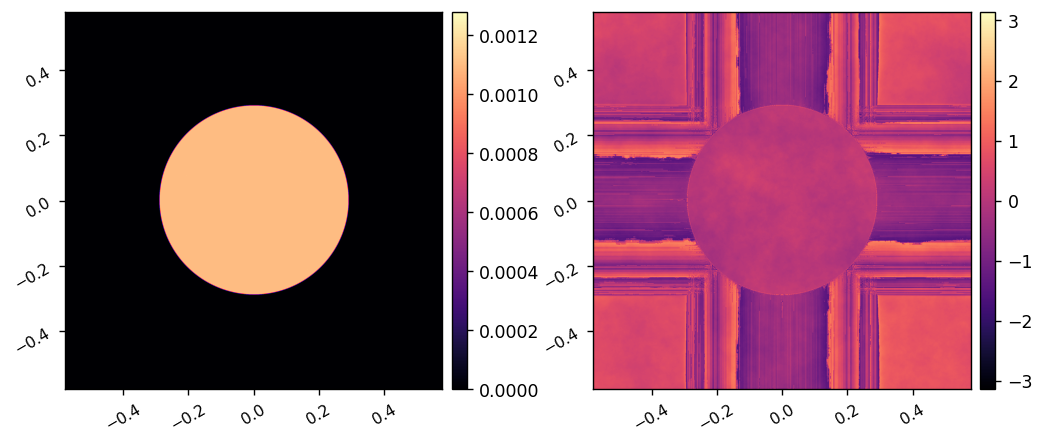

<Quantity 0.0001123 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe74275220>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe74333a90>


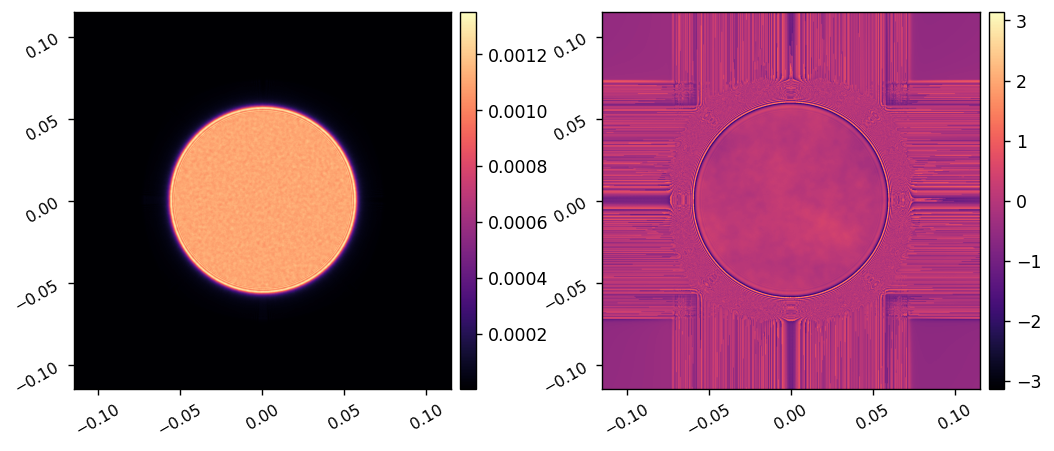

<Quantity 0.0001123 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe5c8ba8e0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe5ca99190>


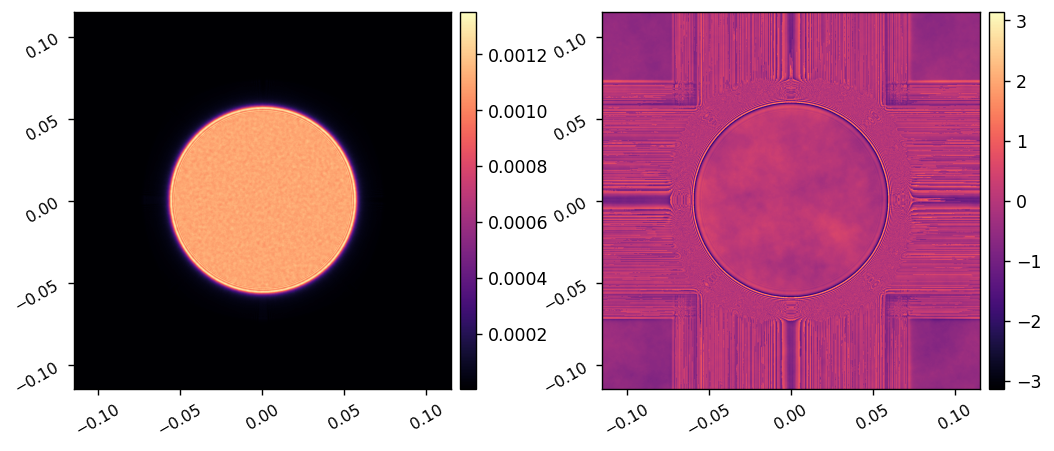

<Quantity 5.88417093e-05 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe746cc1c0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe741e8a30>


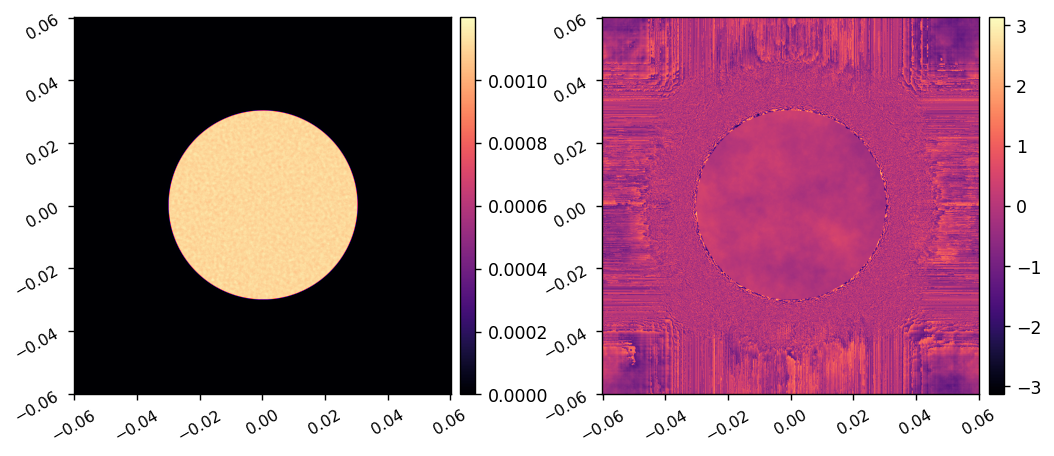

<Quantity 5.88417093e-05 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe742b43d0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe5d455e50>


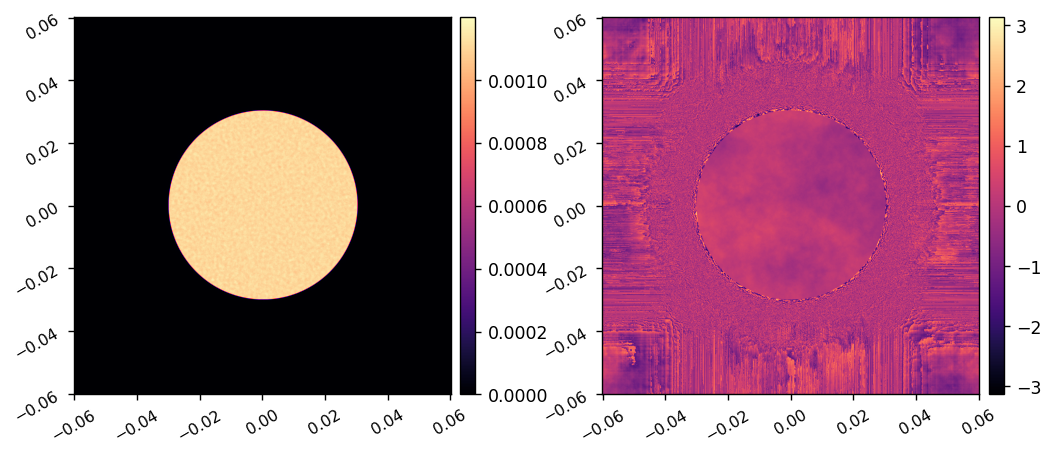

<Quantity 1.77342159e-07 m / pix>

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe5d6677f0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7efe5d77b2b0>


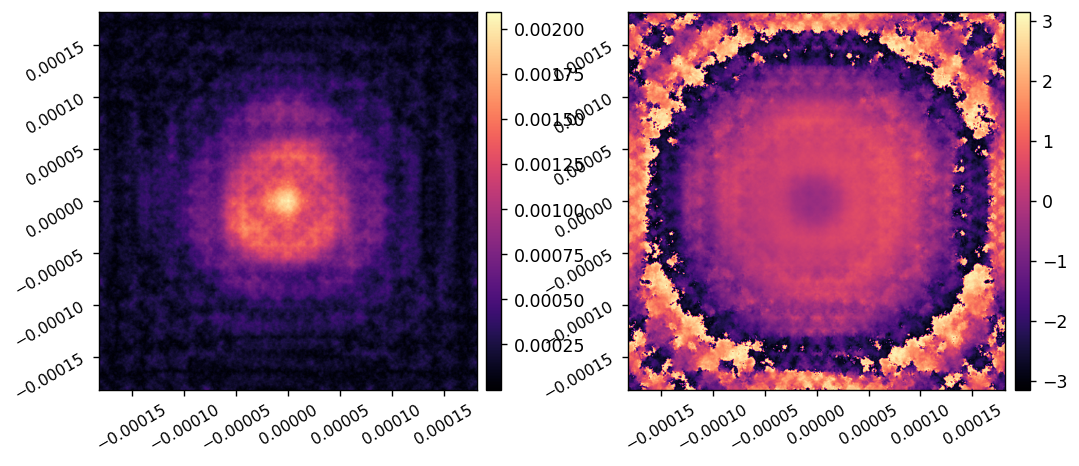

In [29]:
for i in range(len(wfs)):
    display(wfs[i].pixelscale)
    misc.imshow2(wfs[i].amplitude, wfs[i].phase, pxscl=wfs[i].pixelscale)